In [2]:
import os
import numpy as np
import astropy.units as u
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
RHO_DIR = '../data/rho_snapshots/'
xg_file = 'rho.xg'
vel_file = 'vel.xg'

# Read in rho.xg

In [4]:
ofile = open(os.path.join(RHO_DIR, xg_file), 'r')
all_lines = ofile.readlines()
times = []
time_indx = []
for i, iline in enumerate(all_lines):
    if 'Time' in iline:
        times.append(float(iline.split('=')[1]))
        time_indx.append(i)
times = (times*u.s).to(u.day)

# Read in vel.xg

In [5]:
ofile_vel = open(os.path.join(RHO_DIR, vel_file), 'r')
all_lines_vel = ofile_vel.readlines()

# Get snapshot for 14, 43, 17, and 102 days

13.77 d, 14
43.29 d, 43
72.80 d, 73
102.32 d, 102


/Users/bostroem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/Users/bostroem/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


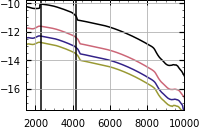

In [7]:
plt.style.use('az-paper-onecol')
for iphase in [14, 43, 73, 102]:
    #Find closest snapshot
    indx = np.argmin(np.abs(times-iphase*u.day))
    #initialize arrays for snapshot
    mass = []
    rho = []
    vel = []
    print('{:2.2f}, {}'.format(times[indx], iphase))
    #Loop over values for the closest snapshot and create table
    for irow in range(time_indx[indx]+1, time_indx[indx+1]):
        
        if all_lines[irow] != '  \n':
            imass1, irho = all_lines[irow].split()
            imass2, ivel = all_lines_vel[irow].split()
            imass1 = float(imass1)
            imass2 = float(imass2)
            irho = float(irho)
            ivel = float(ivel)
            assert imass1 == imass2
            mass.append(imass1)
            rho.append(irho)
            vel.append(ivel)
    plt.plot((vel*u.cm/u.s).to(u.km/u.s), np.log10(rho))
    tbdata = Table([(vel*u.cm/u.s).to(u.km/u.s).value, np.log10(rho)], names=['velocity', 'density'])
    tbdata.write(os.path.join(RHO_DIR, 'rho_{}d.csv'.format(iphase)), overwrite=True, format='csv')
plt.xlim(1500, 10000)
plt.ylim(-17.5, -9.75)
plt.grid()
plt.axvline(4200)
plt.axvline(2300)
    #            